this was last tested against this  version [sb-nb1](https://github.com/nocturnalastro/astropy/pull/1/commits/ab087b226988b101daa16e9b23ac0cc9e2658e41)

In [1]:
import numpy as np
from astropy.modeling.models import Gaussian1D
from itertools import cycle
from astropy.modeling.astro_sherpa import SherpaFitter
from sherpa.stats import Chi2
from collections import  defaultdict
%pylab inline
from itertools import cycle

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = Gaussian1D(amplitude=3, mean=0.9, stddev=0.5)
err = 0.9
step=0.2
x = np.arange(-3, 3,step)
y=model(x)+err*np.random.uniform(-1,1,size=len(x))
yerrs=err * np.random.uniform(0.1,1,size=len(x))
xerrs=(step/2)*np.ones(x.shape)

model.amplitude = 2
model.mean = 0
model.stddev = 0.2


In [3]:
sfit=SherpaFitter()
fitmodels=[]
for xx,yy,yyerr,xxerr in zip([x,x,x,x], [y,y,y,y],[None,None,yerrs,yerrs],[None,xerrs,None,xerrs]):
    fitmodels.append(sfit(model,xx,yy,yerr=yyerr,xerr=xxerr))

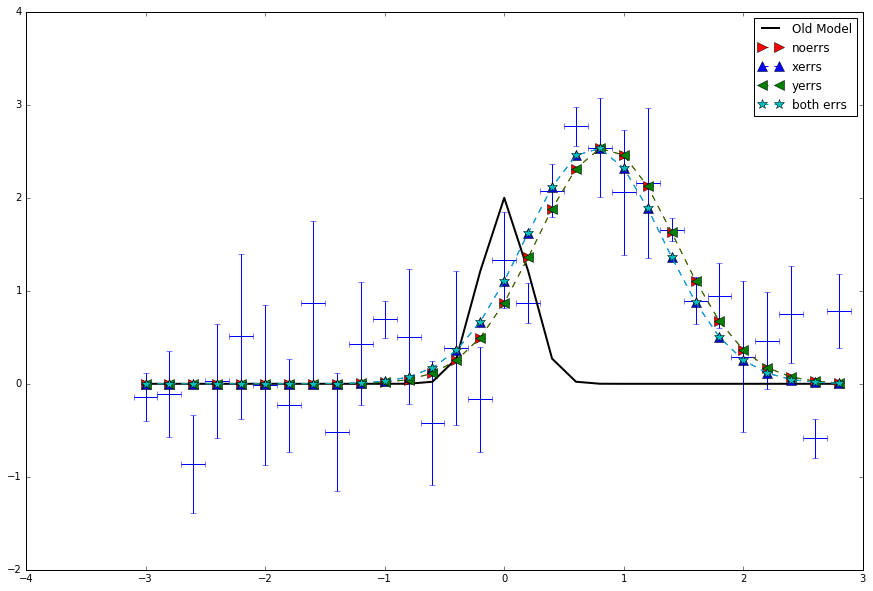

In [4]:
plt.rcParams['figure.figsize']=(15,10)
plt.plot(x, model(x), lw=2, label="Old Model", c="k")
plt.errorbar(x,y,yerr=yerrs,xerr=xerrs,ls="")
colcycle = cycle(['r', 'b', 'g', 'c', 'm'])
m=cycle(['>', '^','<','*'])
lbl=['noerrs','xerrs','yerrs','both errs']
for n,mod in enumerate(fitmodels):
    plt.plot(x,mod(x),label=lbl[n],c=colcycle.next(),
             marker=m.next(),markersize=10,ls="--")
    plt.legend()